## **Platform churn prediction**

# EDA

In [398]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

plt.rcParams["figure.figsize"] = (5, 3)
plt.rcParams["font.size"] = 12

In [399]:
df = pd.read_csv("Telco Customer Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [400]:
df.shape

(7043, 21)

In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [402]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [403]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [404]:
df[np.isnan(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [405]:
df = df.dropna(subset=["TotalCharges"])
df.shape

(7032, 21)

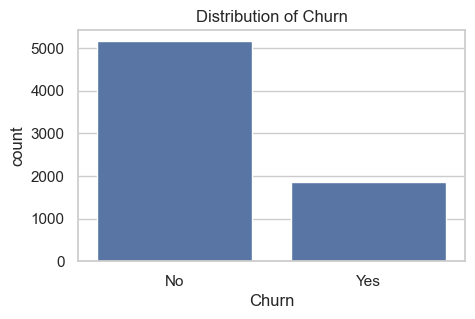

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64

In [406]:
sns.countplot(x="Churn", data=df)
plt.title("Distribution of Churn")
plt.show()

df["Churn"].value_counts(normalize=True) * 100

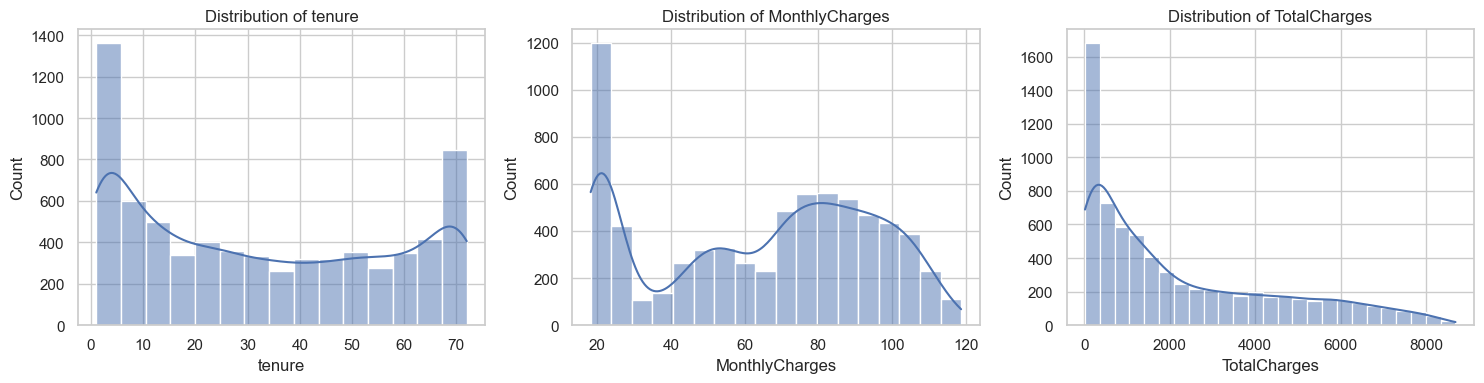

In [407]:
numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, col in zip(axes, numeric_cols):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

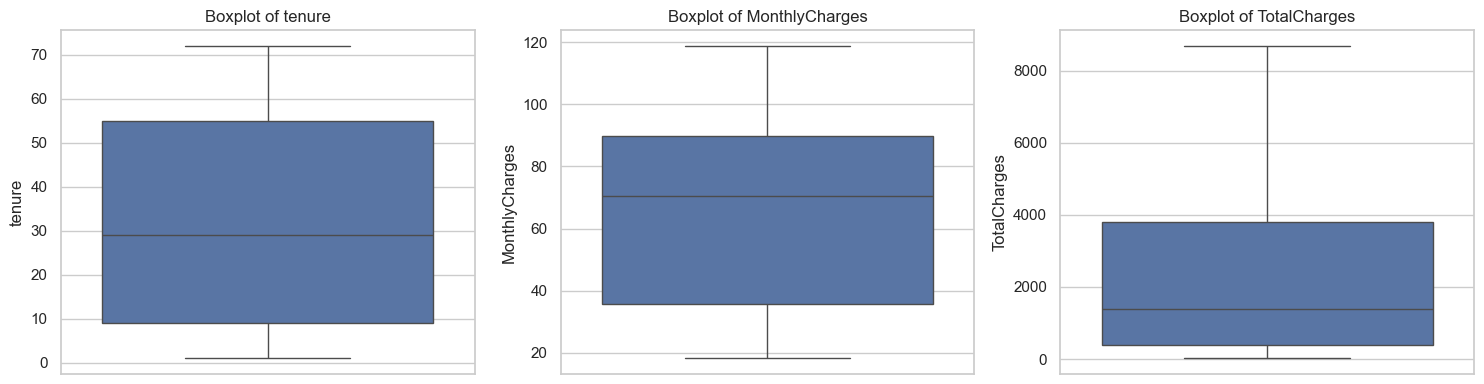

In [408]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, col in zip(axes, numeric_cols):
    sns.boxplot(y=df[col], ax=ax)
    ax.set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()



Churn rate by gender:

Churn         No       Yes
gender                    
Female  0.730405  0.269595
Male    0.737954  0.262046

Churn rate by SeniorCitizen:

Churn                No       Yes
SeniorCitizen                    
0              0.763497  0.236503
1              0.583187  0.416813

Churn rate by Partner:

Churn          No       Yes
Partner                    
No       0.670239  0.329761
Yes      0.802829  0.197171

Churn rate by Dependents:

Churn             No       Yes
Dependents                    
No          0.687209  0.312791
Yes         0.844688  0.155312

Churn rate by PhoneService:

Churn               No       Yes
PhoneService                    
No            0.750000  0.250000
Yes           0.732525  0.267475

Churn rate by MultipleLines:

Churn                   No       Yes
MultipleLines                       
No                0.749188  0.250812
No phone service  0.750000  0.250000
Yes               0.713515  0.286485

Churn rate by InternetService:

C

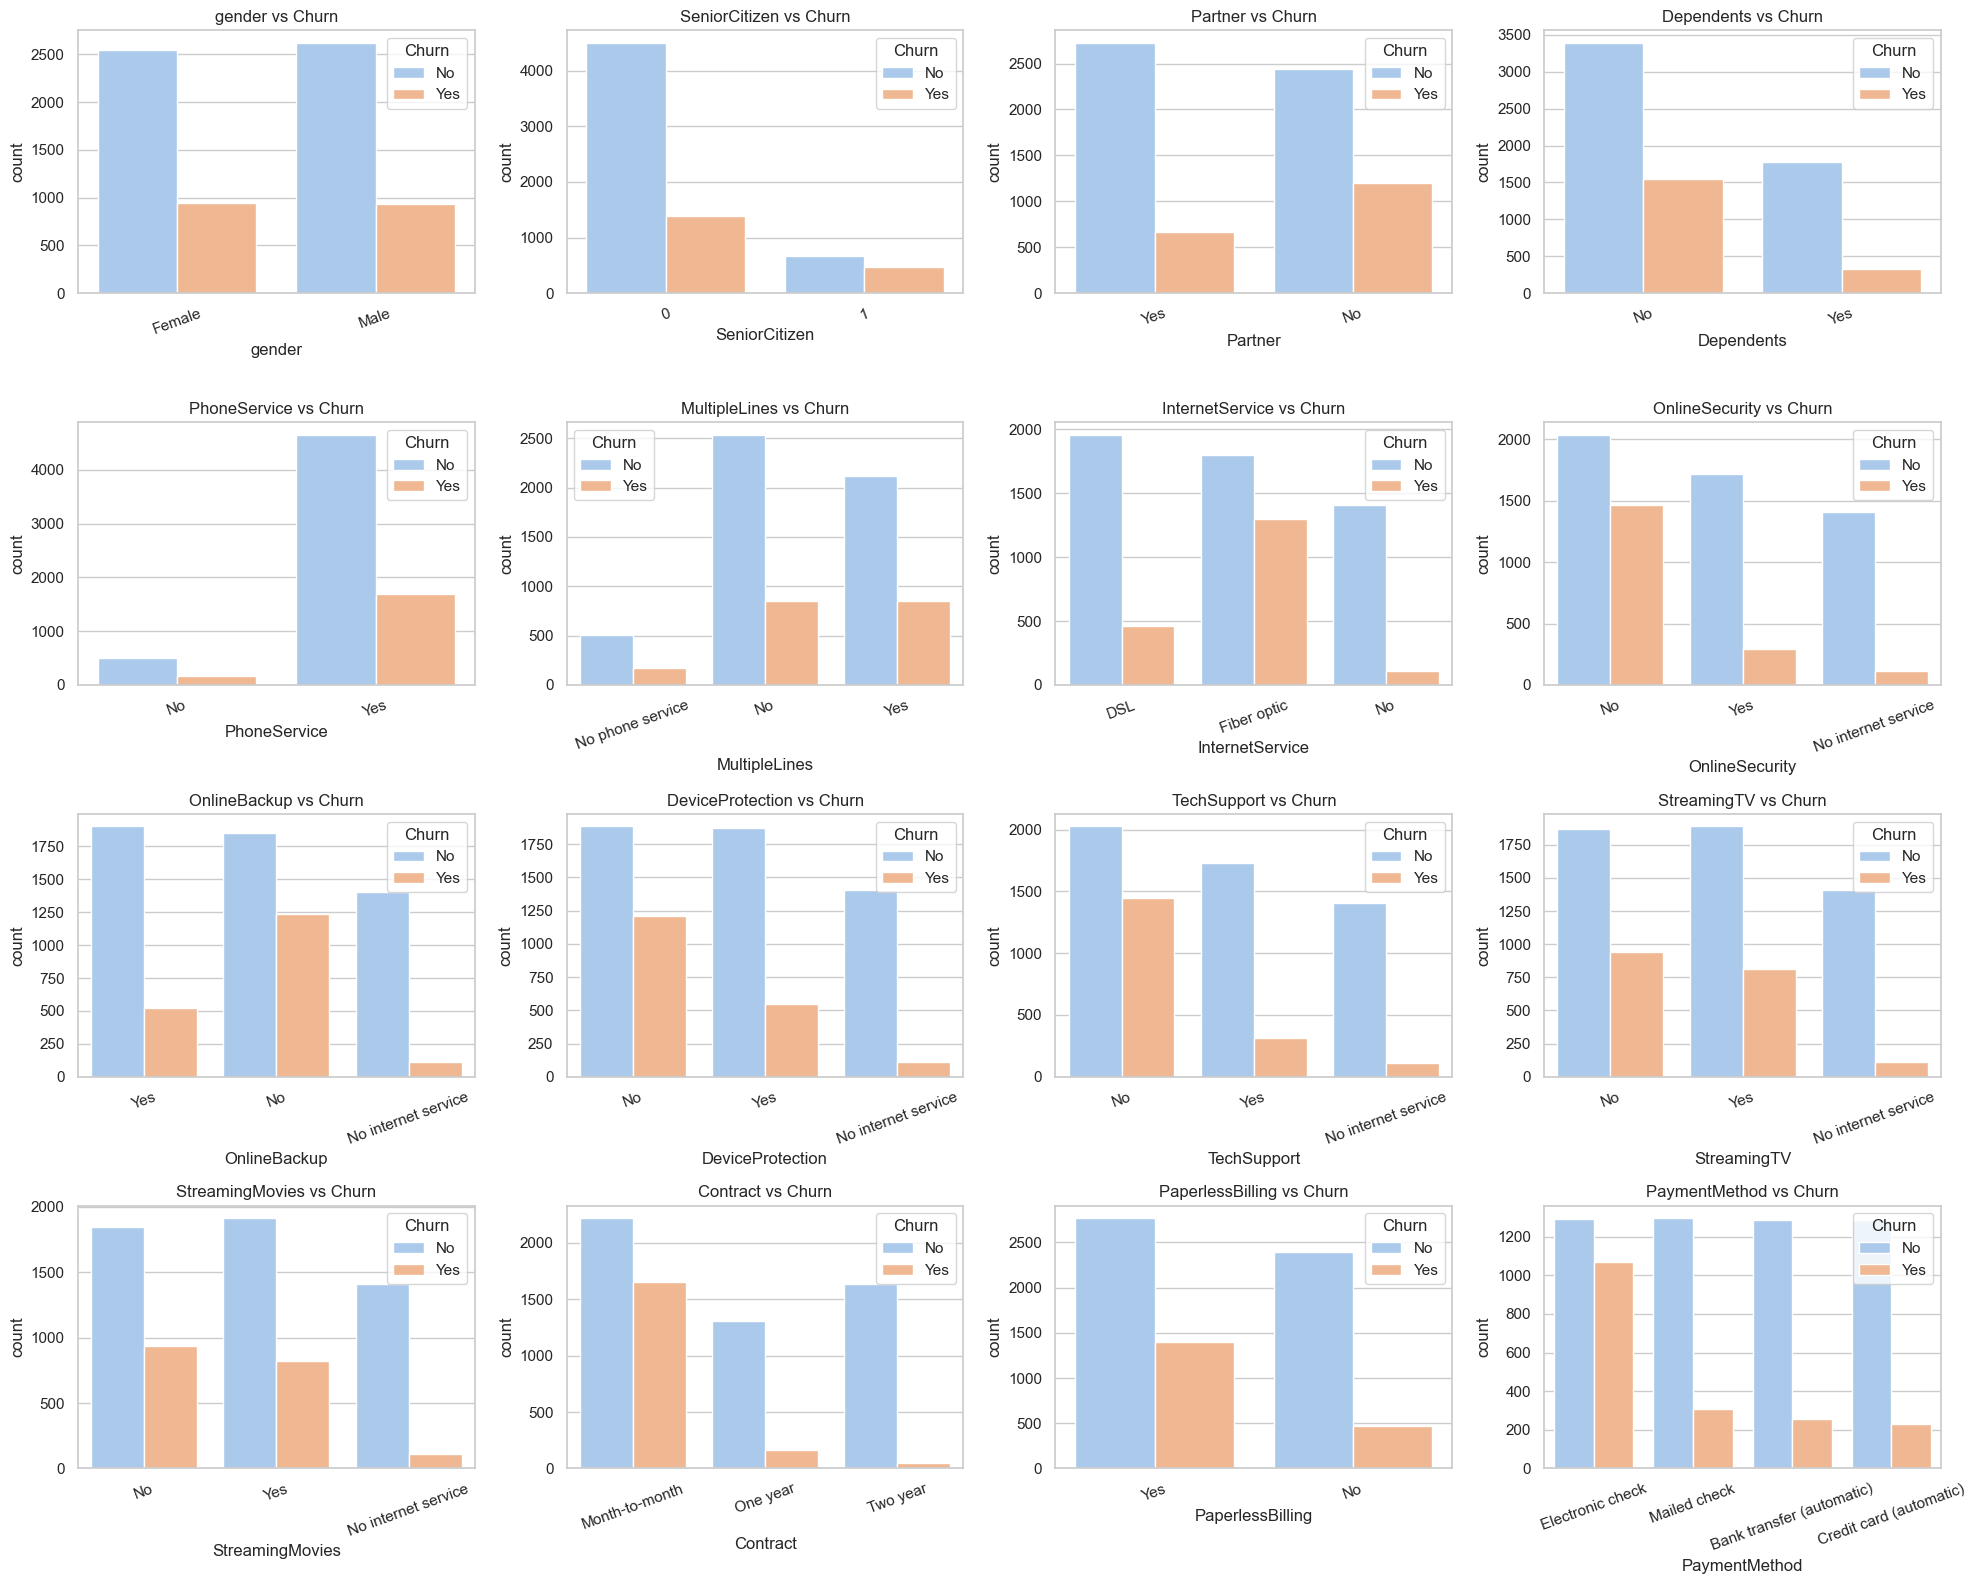

In [409]:
import math

categorical_cols = ["gender","SeniorCitizen","Partner","Dependents",
                    "PhoneService","MultipleLines","InternetService",
                    "OnlineSecurity","OnlineBackup","DeviceProtection",
                    "TechSupport","StreamingTV","StreamingMovies",
                    "Contract","PaperlessBilling","PaymentMethod"]

n_cols_per_row = 4
n_rows = math.ceil(len(categorical_cols) / n_cols_per_row)

fig, axes = plt.subplots(n_rows, n_cols_per_row, figsize=(20, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    print(f"\nChurn rate by {col}:\n")
    print(pd.crosstab(df[col], df["Churn"], normalize="index"))

    sns.countplot(x=col, hue="Churn", data=df, palette="pastel", ax=axes[i])
    axes[i].set_title(f"{col} vs Churn")
    axes[i].tick_params(axis='x', rotation=20)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Preprocess

In [410]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [411]:
duplicate_rows = df[df.duplicated(keep=False)]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
duplicate_rows


Number of duplicate rows: 0


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [412]:
df = df.drop(columns=["customerID"])

In [413]:
# Outlier detection
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {outliers.shape[0]} outliers")

tenure: 0 outliers
MonthlyCharges: 0 outliers
TotalCharges: 0 outliers


In [414]:
numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

binary_cols = ["SeniorCitizen", "Partner", "Dependents", "PhoneService", "PaperlessBilling"]

categorical_cols = ["gender", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", 
"DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaymentMethod"]

In [415]:
binary_mapping = {"Yes": 1, "No": 0}

for col in binary_cols:
    if df[col].dtype == "object":
        df[col] = df[col].map(binary_mapping)

df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})


In [416]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,False,...,False,False,False,False,False,False,False,False,True,False
1,0,0,0,34,1,0,56.95,1889.50,0,True,...,False,False,False,False,False,True,False,False,False,True
2,0,0,0,2,1,1,53.85,108.15,1,True,...,False,False,False,False,False,False,False,False,False,True
3,0,0,0,45,0,0,42.30,1840.75,0,True,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,2,1,1,70.70,151.65,1,False,...,False,False,False,False,False,False,False,False,True,False


In [417]:
# Normalization
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


# Clustering

In [418]:
core_features = [
    'tenure',
    'MonthlyCharges',
    'TotalCharges'
]

contract_features = [
    'Contract_One year',
    'Contract_Two year',
    'PaymentMethod_Credit card (automatic)',
    'PaymentMethod_Electronic check',
    'PaymentMethod_Mailed check'
]

service_features = [
    'PhoneService',
    'PaperlessBilling',
    'TechSupport_Yes',
    'StreamingTV_Yes',
    'StreamingMovies_Yes'
]

weak_features = [
    'SeniorCitizen',
    'Partner',
    'Dependents'
]

feature_sets = {
    "F1_core_only": core_features,

    "F2_core_contract": core_features + contract_features,

    "F3_core_contract_service": core_features + contract_features + service_features,

    "F4_all_behavioral": core_features + contract_features + service_features + weak_features
}


In [419]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def evaluate_feature_set(df, features, k_range=range(2, 7)):
    X = df[features]

    results = []

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X)

        score = silhouette_score(X, labels)

        results.append({
            "Features": features,
            "K": k,
            "Silhouette": score
        })

    return pd.DataFrame(results)


In [420]:
all_results = []

for name, features in feature_sets.items():
    res = evaluate_feature_set(df, features)
    res['Feature_Set'] = name
    all_results.append(res)

results_df = pd.concat(all_results, ignore_index=True)


In [421]:
results_df.sort_values(by='Silhouette', ascending=False).head(10)

,Features,K,Silhouette,Feature_Set
0,"[tenure, MonthlyCharges, TotalCharges]",2,0.479524,F1_core_only
2,"[tenure, MonthlyCharges, TotalCharges]",4,0.472085,F1_core_only
1,"[tenure, MonthlyCharges, TotalCharges]",3,0.451513,F1_core_only
3,"[tenure, MonthlyCharges, TotalCharges]",5,0.443269,F1_core_only
4,"[tenure, MonthlyCharges, TotalCharges]",6,0.437604,F1_core_only
5,"[tenure, MonthlyCharges, TotalCharges, Contrac...",2,0.374816,F2_core_contract
10,"[tenure, MonthlyCharges, TotalCharges, Contrac...",2,0.325159,F3_core_contract_service
6,"[tenure, MonthlyCharges, TotalCharges, Contrac...",3,0.322314,F2_core_contract
7,"[tenure, MonthlyCharges, TotalCharges, Contrac...",4,0.320645,F2_core_contract
15,"[tenure, MonthlyCharges, TotalCharges, Contrac...",2,0.296232,F4_all_behavioral


In [422]:
from sklearn.cluster import KMeans

best_features = feature_sets["F1_core_only"]

X_cluster = df[best_features]

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_cluster)

print(df['Cluster'].value_counts())

print(df.groupby('Cluster')[best_features].mean())


Cluster
1    4672
0    2360
Name: count, dtype: int64
           tenure  MonthlyCharges  TotalCharges
Cluster                                        
0        0.995924        0.829614      1.236068
1       -0.503078       -0.419069     -0.624384


# BII

In [423]:
usage_cols = ["tenure", "StreamingTV_Yes", "StreamingMovies_Yes"]
cost_cols = ["MonthlyCharges", "TotalCharges"]
engagement_cols = ["OnlineSecurity_Yes", "OnlineBackup_Yes", 
                   "DeviceProtection_Yes", "TechSupport_Yes", "PhoneService"]

df["BII"] = (
    abs(df[usage_cols].mean(axis=1) - df[cost_cols].mean(axis=1)) +
    abs(df[usage_cols].mean(axis=1) - df[engagement_cols].mean(axis=1)) +
    abs(df[cost_cols].mean(axis=1) - df[engagement_cols].mean(axis=1))
)
df["BII"] = df["BII"].astype(float)

scaler = StandardScaler()
df["BII"] = scaler.fit_transform(df[["BII"]]).flatten()
df.head()


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Cluster,BII
0,0,1,0,-1.280248,0,1,-1.161694,-0.994194,0,False,...,False,False,False,False,False,False,True,False,1,1.138640
1,0,0,0,0.064303,1,0,-0.260878,-0.173740,0,True,...,False,False,False,True,False,False,False,True,1,0.008222
2,0,0,0,-1.239504,1,1,-0.363923,-0.959649,1,True,...,False,False,False,False,False,False,False,True,1,1.098988
3,0,0,0,0.512486,0,0,-0.747850,-0.195248,0,True,...,False,False,False,True,False,False,False,False,1,0.632138
4,0,0,0,-1.239504,1,1,0.196178,-0.940457,1,False,...,False,False,False,False,False,False,True,False,1,-0.492748


# Feature selection

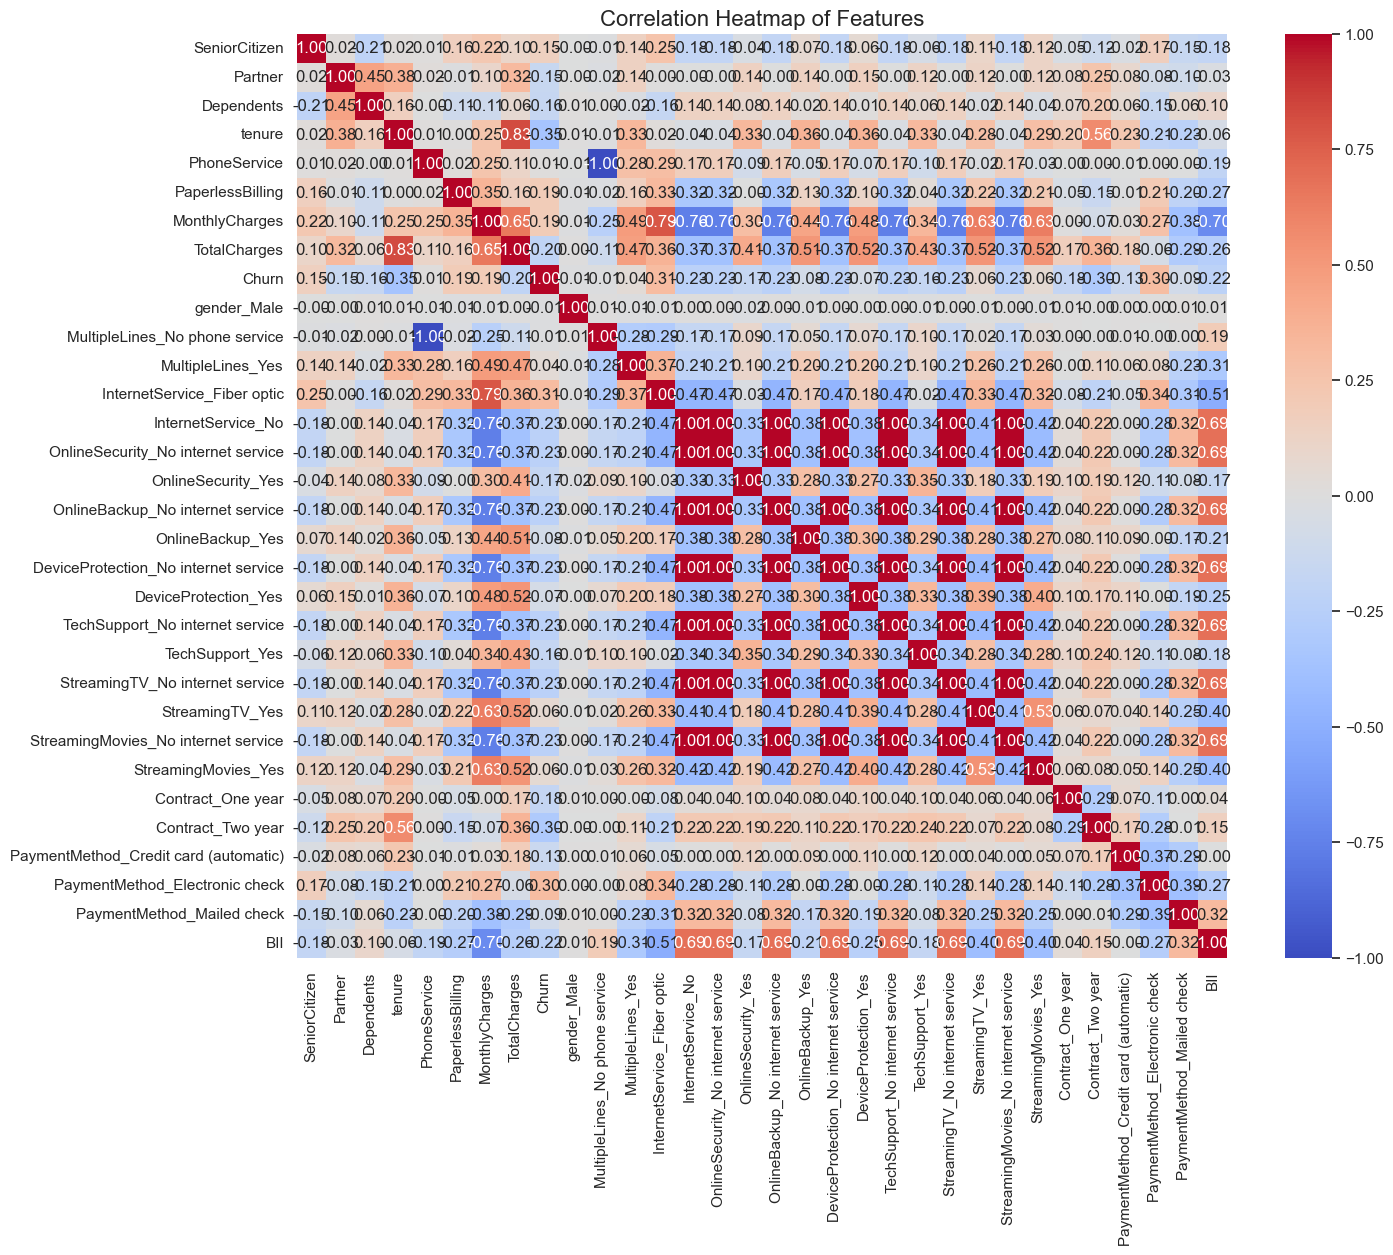

In [424]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=["float64", "int64", "bool"]).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Features", fontsize=16)
plt.show()

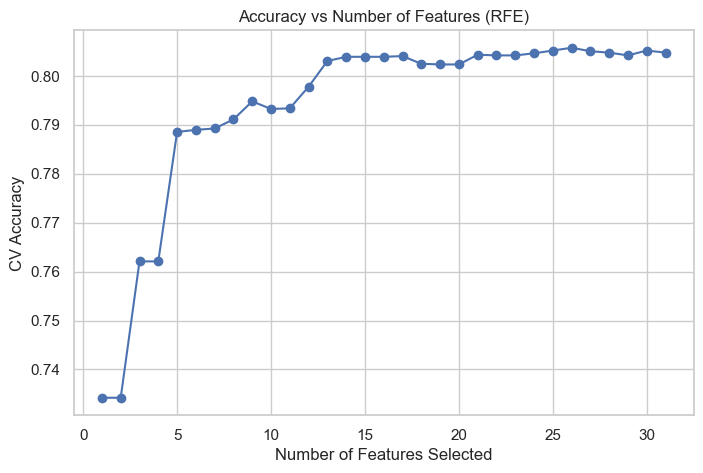

In [425]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

X = df.drop(columns=['Churn', 'Cluster'])
y = df['Churn']

model = LogisticRegression(max_iter=1000, random_state=42)

n_features = X.shape[1]

scores = []

for i in range(1, n_features+1):
    selector = RFE(model, n_features_to_select=i)
    X_selected = selector.fit_transform(X, y)
    
    score = cross_val_score(model, X_selected, y, cv=5, scoring='accuracy').mean()
    scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(range(1, n_features+1), scores, marker='o')
plt.xlabel("Number of Features Selected")
plt.ylabel("CV Accuracy")
plt.title("Accuracy vs Number of Features (RFE)")
plt.grid(True)
plt.show()


In [426]:
corr_matrix = df.corr().abs()

upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

print("Columns to drop due to high correlation:", to_drop)
df.drop(columns=to_drop, inplace=True)

df.head()

Columns to drop due to high correlation: ['MultipleLines_No phone service', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service']


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Cluster,BII
0,0,1,0,-1.280248,0,1,-1.161694,-0.994194,0,False,...,False,False,False,False,False,False,True,False,1,1.138640
1,0,0,0,0.064303,1,0,-0.260878,-0.173740,0,True,...,False,False,False,True,False,False,False,True,1,0.008222
2,0,0,0,-1.239504,1,1,-0.363923,-0.959649,1,True,...,False,False,False,False,False,False,False,True,1,1.098988
3,0,0,0,0.512486,0,0,-0.747850,-0.195248,0,True,...,True,False,False,True,False,False,False,False,1,0.632138
4,0,0,0,-1.239504,1,1,0.196178,-0.940457,1,False,...,False,False,False,False,False,False,True,False,1,-0.492748


In [427]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Cluster,BII
0,0,1,0,-1.280248,0,1,-1.161694,-0.994194,0,False,...,False,False,False,False,False,False,True,False,1,1.138640
1,0,0,0,0.064303,1,0,-0.260878,-0.173740,0,True,...,False,False,False,True,False,False,False,True,1,0.008222
2,0,0,0,-1.239504,1,1,-0.363923,-0.959649,1,True,...,False,False,False,False,False,False,False,True,1,1.098988
3,0,0,0,0.512486,0,0,-0.747850,-0.195248,0,True,...,True,False,False,True,False,False,False,False,1,0.632138
4,0,0,0,-1.239504,1,1,0.196178,-0.940457,1,False,...,False,False,False,False,False,False,True,False,1,-0.492748


# model

# Random Forest


===== Cluster 1 =====
CV Accuracy on Cluster 1: 0.7708
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      3202
           1       0.66      0.56      0.61      1470

    accuracy                           0.77      4672
   macro avg       0.74      0.71      0.72      4672
weighted avg       0.76      0.77      0.77      4672


===== Cluster 0 =====
CV Accuracy on Cluster 0: 0.8301
              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1961
           1       0.49      0.16      0.24       399

    accuracy                           0.83      2360
   macro avg       0.67      0.56      0.57      2360
weighted avg       0.79      0.83      0.79      2360



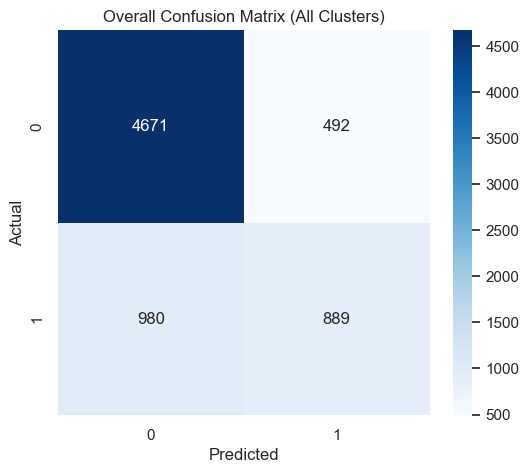

Overall Accuracy: 0.7906712172923777
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      5163
           1       0.64      0.48      0.55      1869

    accuracy                           0.79      7032
   macro avg       0.74      0.69      0.71      7032
weighted avg       0.78      0.79      0.78      7032



In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

y_true_total = []
y_pred_total = []

clusters = df["Cluster"].unique()
n_splits = 5  

for cluster in clusters:
    print(f"\n===== Cluster {cluster} =====")
    
    cluster_df = df[df["Cluster"] == cluster].copy()
    
    X = cluster_df.drop(columns=["Churn", "Cluster"])
    y_cluster = cluster_df["Churn"]
    
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    y_pred_cv = cross_val_predict(rf, X, y_cluster, cv=skf)
    
    y_true_total.extend(y_cluster)
    y_pred_total.extend(y_pred_cv)
    
    acc = accuracy_score(y_cluster, y_pred_cv)
    print(f"CV Accuracy on Cluster {cluster}: {acc:.4f}")
    print(classification_report(y_cluster, y_pred_cv))

cm_total = confusion_matrix(y_true_total, y_pred_total)
plt.figure(figsize=(6,5))
sns.heatmap(cm_total, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Overall Confusion Matrix (All Clusters)")
plt.show()

print("Overall Accuracy:", accuracy_score(y_true_total, y_pred_total))
print(classification_report(y_true_total, y_pred_total))


# XGBoost


===== Cluster 1 =====


Cross-validated Accuracy (5-fold): 0.7821 ± 0.0117
Training Accuracy on Cluster 1: 0.8423

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89      3202
           1       0.77      0.71      0.74      1470

    accuracy                           0.84      4672
   macro avg       0.82      0.81      0.81      4672
weighted avg       0.84      0.84      0.84      4672



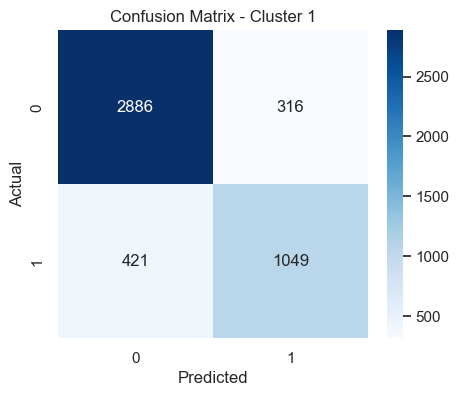


===== Cluster 0 =====
Cross-validated Accuracy (5-fold): 0.8203 ± 0.0109
Training Accuracy on Cluster 0: 0.9127

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      1961
           1       0.90      0.54      0.68       399

    accuracy                           0.91      2360
   macro avg       0.91      0.77      0.81      2360
weighted avg       0.91      0.91      0.90      2360



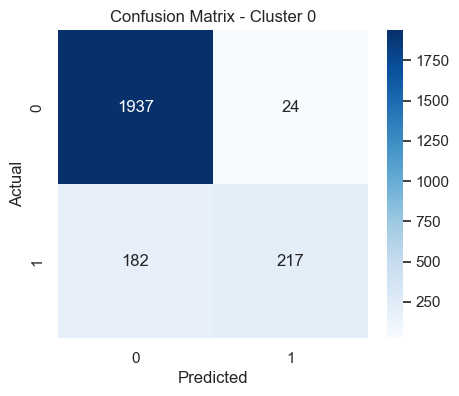

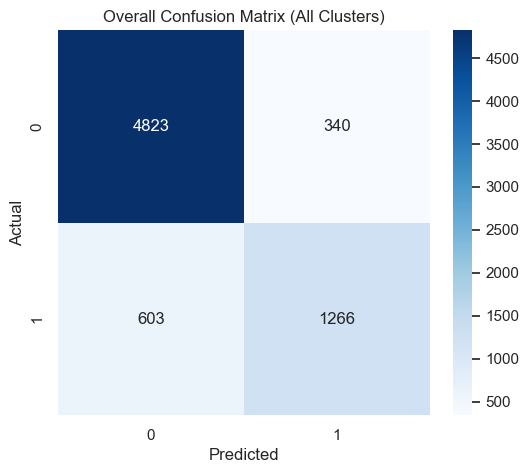

Overall Accuracy: 0.8658987485779295
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      5163
           1       0.79      0.68      0.73      1869

    accuracy                           0.87      7032
   macro avg       0.84      0.81      0.82      7032
weighted avg       0.86      0.87      0.86      7032



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from xgboost import XGBClassifier

# لیست خوشه‌ها
clusters = df["Cluster"].unique()

y_true_total = []
y_pred_total = []

results = {}

for cluster in clusters:
    print(f"\n===== Cluster {cluster} =====")
    
    cluster_df = df[df["Cluster"] == cluster].copy()
    
    X = cluster_df.drop(columns=["Churn", "Cluster"])
    y_cluster = cluster_df["Churn"]
    
    xgb = XGBClassifier(
        n_estimators=100,
        max_depth=5,
        learning_rate=0.1,
        random_state=42,
        eval_metric='logloss'
    )
    
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(xgb, X, y_cluster, cv=skf, scoring="accuracy")
    
    print(f"Cross-validated Accuracy (5-fold): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    
    xgb.fit(X, y_cluster)
    y_pred = xgb.predict(X)
    
    y_true_total.extend(y_cluster)
    y_pred_total.extend(y_pred)
    
    acc = accuracy_score(y_cluster, y_pred)
    print(f"Training Accuracy on Cluster {cluster}: {acc:.4f}")
    print("\nClassification Report:\n", classification_report(y_cluster, y_pred))
    
    cm = confusion_matrix(y_cluster, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - Cluster {cluster}")
    plt.show()
    
    results[cluster] = {
        "cv_scores": cv_scores,
        "training_accuracy": acc,
        "confusion_matrix": cm
    }

cm_total = confusion_matrix(y_true_total, y_pred_total)
plt.figure(figsize=(6,5))
sns.heatmap(cm_total, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Overall Confusion Matrix (All Clusters)")
plt.show()

print("Overall Accuracy:", accuracy_score(y_true_total, y_pred_total))
print(classification_report(y_true_total, y_pred_total))
